# Section 1
Compare Dice Coefficient using :
1. Binary Thresholding with a fixed threshold.
2. Otsu's Method.
3. Optimized thresholding using the Dice Coefficient.
4.
Visualize the results by comparison of the original image, ground truth mask, and the results from each thresholding method.

P.S: Use skimage library

Input Image

In [ ]:
!gdown "1sWYKuwLg_1nFylJ1h9Xpjr5zy-1-BwcN"  # Input image

Downloading...
From: https://drive.google.com/uc?id=1sWYKuwLg_1nFylJ1h9Xpjr5zy-1-BwcN
To: /content/LAB05 IMG1.png
100% 61.6k/61.6k [00:00<00:00, 3.37MB/s]


Ground Truth Image


In [ ]:
!gdown "15jipoft8qFVghFrLVlWTDJmvtZTKuVeB" # Ground Truth

Downloading...
From: https://drive.google.com/uc?id=15jipoft8qFVghFrLVlWTDJmvtZTKuVeB
To: /content/LAB05 IMG2.png
100% 15.4k/15.4k [00:00<00:00, 31.7MB/s]


In [ ]:
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

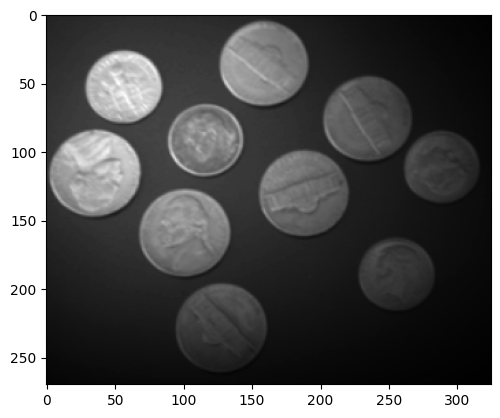

In [ ]:
# Load and display the input image
# Answer your code here
show_imgs = []
in_img = io.imread("/content/LAB05 IMG1.png", as_gray =True)
in_img = (np.round(in_img * 255)).astype(np.uint8)
plt.imshow(in_img, cmap = "gray")
plt.show()
show_imgs.append([in_img, None, None])


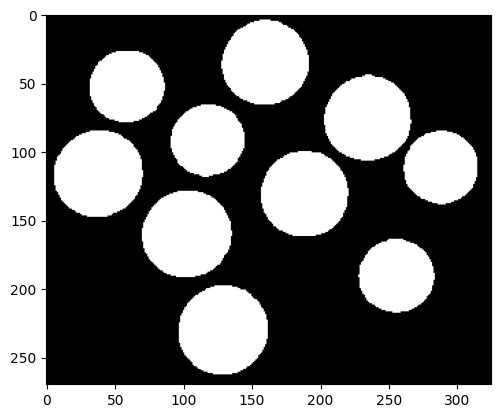

In [ ]:
# Load and display the ground truth image
# Answer your code here
gt_img = io.imread("/content/LAB05 IMG2.png", as_gray =True)
gt_img = cv2.resize(gt_img, in_img.shape[::-1])
gt_img = (gt_img > 0.5).astype(np.uint8)
plt.imshow(gt_img, cmap = "gray")
plt.show()

show_imgs.append([gt_img, None, None])

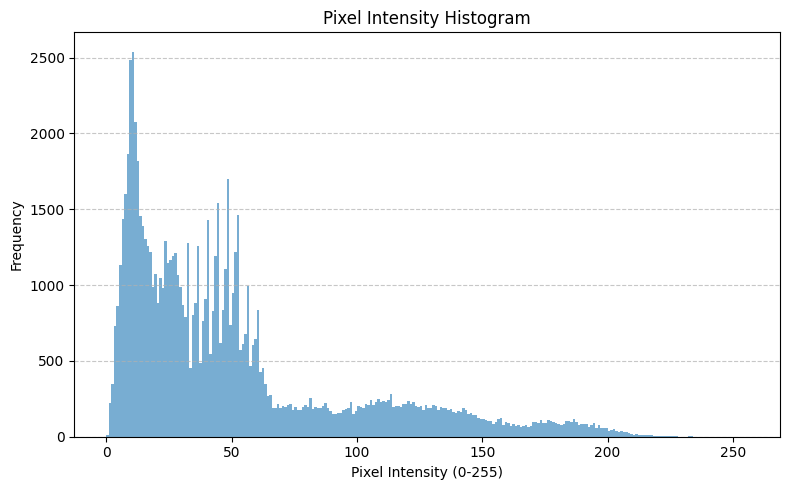

In [ ]:
# Answer your code here
plt.figure(figsize = (8,5))
plt.hist(in_img.ravel(), bins=256, range=[0,256], alpha = 0.6)
plt.title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
threshold = 65
fix_threshold_img = (in_img >= threshold).astype(np.uint8)

intersection = np.sum(fix_threshold_img * gt_img)
dice_coefficient = (2. * intersection) / (np.sum(fix_threshold_img) + np.sum(gt_img))
print("Fix Thresholding")
print("threshold: ", threshold)
print(f"Dice Coefficient: {dice_coefficient:.4f}")

show_imgs.append([fix_threshold_img, threshold, dice_coefficient])

Fix Thresholding
threshold:  65
Dice Coefficient: 0.8091


In [ ]:
from skimage.filters import threshold_otsu
threshold = threshold_otsu(in_img)
otsu_threshold_img = (in_img >= threshold).astype(np.uint8)

intersection = np.sum(otsu_threshold_img * gt_img)
dice_coefficient = (2. * intersection) / (np.sum(otsu_threshold_img) + np.sum(gt_img))
print("Otsu Thresholding")
print("threshold: ", threshold)
print(f"Dice Coefficient: {dice_coefficient:.4f}")

show_imgs.append([otsu_threshold_img, threshold, dice_coefficient])

Otsu Thresholding
threshold:  80
Dice Coefficient: 0.7489


In [ ]:
best_threshold = 0
max_dice = 0
dice_values = []

for threshold in range(256):
    _, binary_image = cv2.threshold(in_img, threshold, 1, cv2.THRESH_BINARY)

    intersection = np.sum(binary_image * gt_img)
    dice_coefficient = (2. * intersection) / (np.sum(binary_image) + np.sum(gt_img) + 1e-6)
    dice_values.append(dice_coefficient)

    if dice_coefficient > max_dice:
        max_dice = dice_coefficient
        best_threshold = threshold

#########################################################

_, optimized_img = cv2.threshold(in_img, best_threshold, 1, cv2.THRESH_BINARY)
intersection = np.sum(optimized_img * gt_img)
dice_coefficient = (2. * intersection) / (np.sum(optimized_img) + np.sum(gt_img))
print("Optimize thresholding")
print("threshold: ", best_threshold)
print(f"Dice Coefficient: {dice_coefficient:.4f}")

show_imgs.append([optimized_img, best_threshold, dice_coefficient])

Optimize thresholding
threshold:  60
Dice Coefficient: 0.8180


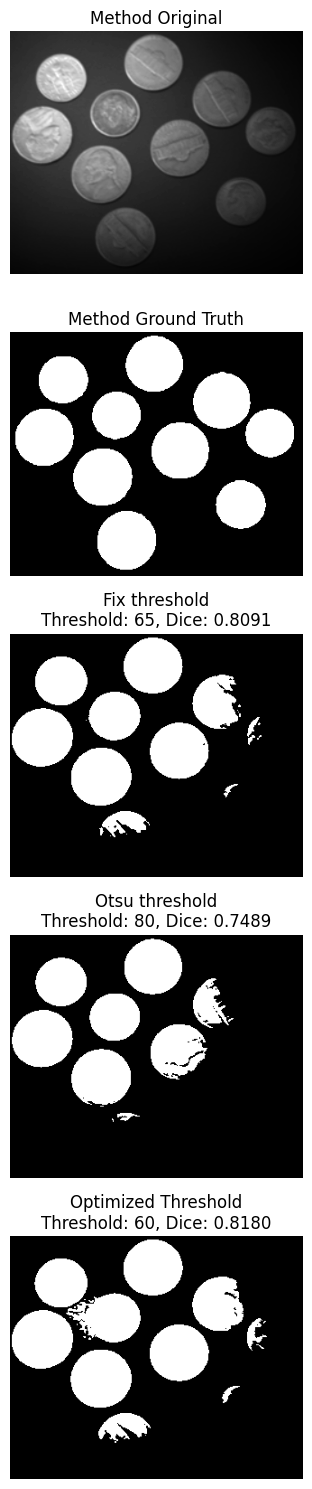

In [ ]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(show_imgs), 1, figsize=(5, 3 * len(show_imgs)))

name = ["Original", "Ground Truth", "Fix threshold", "Otsu threshold", "Optimized Threshold"]

for i, result in enumerate(zip(name, show_imgs)):
    method, result = result
    img, threshold, dice = result
    axes[i].imshow(img, cmap='gray')
    if (threshold is not None) and (dice is not None):
        title = f"{method}\nThreshold: {threshold}, Dice: {dice:.4f}"
    else:
        title = f"Method {method}"
    axes[i].set_title(title)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Section 2
Image Clustering
1. Use the given image and try clustering with 3 different k.
2. Compare and display the results.
3. In which scenario, small k or large k, do the dogs in the image retain the most visual detail?

P.S: Use OpenCV library

In [ ]:
!gdown "1VwgQxqmhhZTCRqI77kkS6cVRunBzZdsa" # Input image for clustering

Downloading...
From: https://drive.google.com/uc?id=1VwgQxqmhhZTCRqI77kkS6cVRunBzZdsa
To: /content/LAB 05 shiba.jpg
100% 99.2k/99.2k [00:00<00:00, 3.85MB/s]


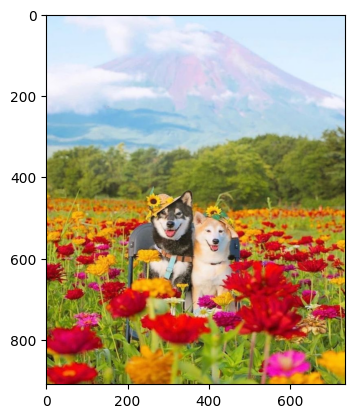

In [ ]:
# Answer your code here
dog_img = cv2.imread("/content/LAB 05 shiba.jpg")
dog_img = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)
plt.imshow(dog_img)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

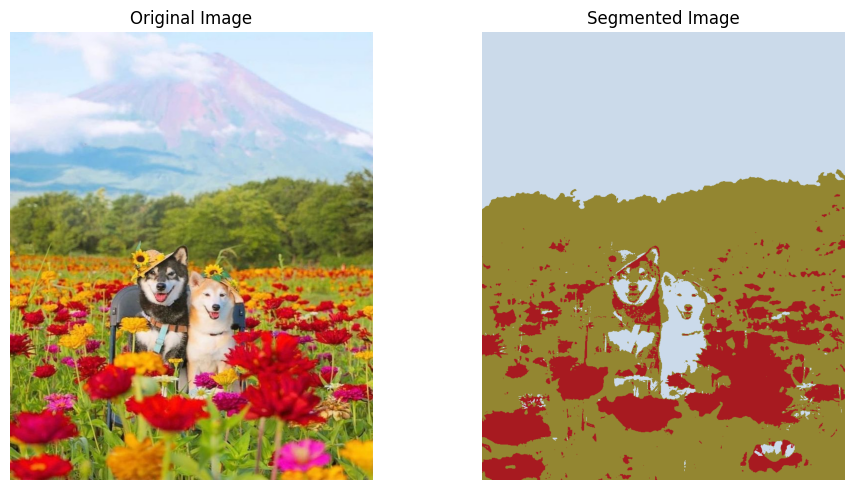

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(dog_img.reshape(-1,3))
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_pixels.reshape(dog_img.shape).astype('uint8')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(dog_img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis("off")

plt.tight_layout()
plt.show()

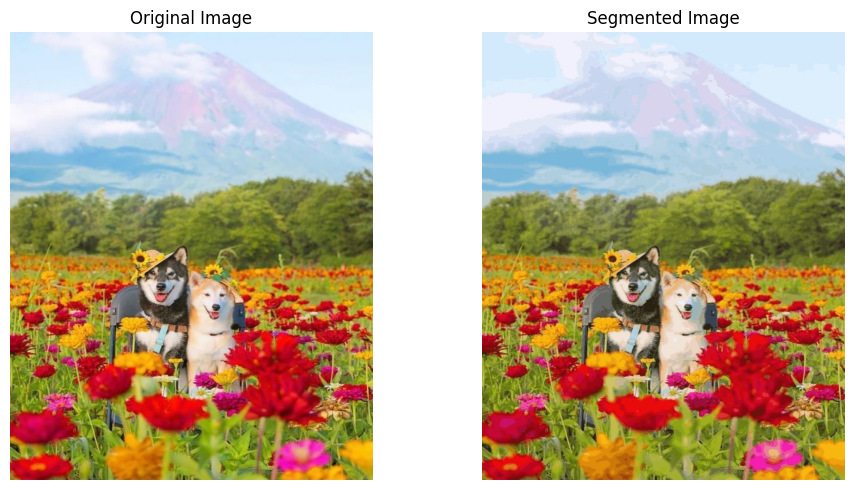

In [ ]:
k = 100
kmeans = KMeans(n_clusters=k, random_state=0).fit(dog_img.reshape(-1,3))
segmented_pixels = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_pixels.reshape(dog_img.shape).astype('uint8')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(dog_img)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Answer: Large K retain more image detail.

# Section 3

Binary image processing (Basic operators)


> Data that you'll use in this section is "old text paragraph image" and implement to solve each prblem to get result with scikit-image libraries.


1.   In image there has some alphabets which missing and faded so you need to make whole paragraph more clear and easy to read than original image.



In [ ]:
#import data
!gdown 11WNV3Yr6hZNpRVF4ftNaNF8DYyVlWJlX

Downloading...
From: https://drive.google.com/uc?id=11WNV3Yr6hZNpRVF4ftNaNF8DYyVlWJlX
To: /content/OldText.png
100% 148k/148k [00:00<00:00, 4.40MB/s]


In [ ]:
# Import libraries
# Load and display the input image
# Answer your code here
from skimage import morphology
from skimage import filters

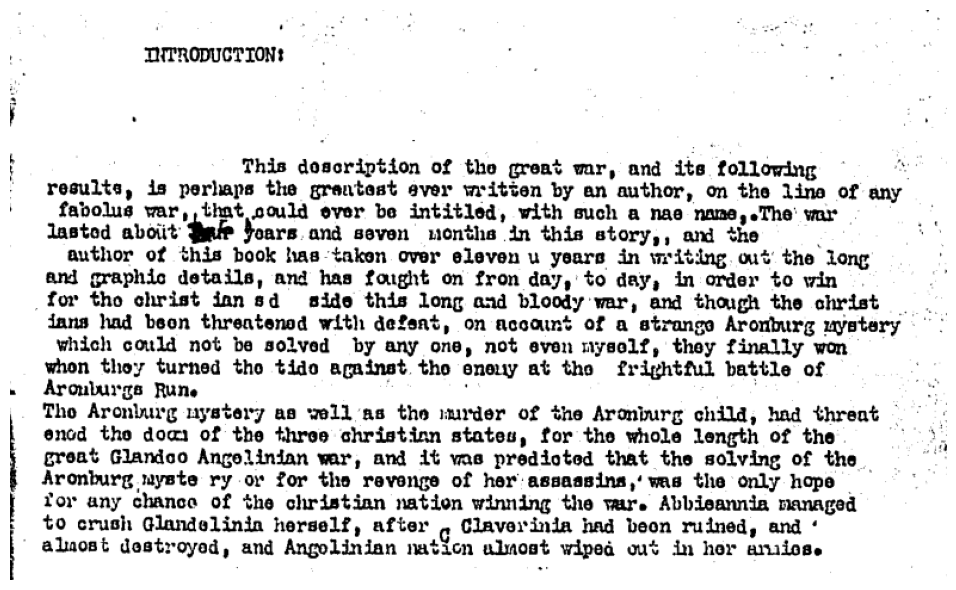

In [ ]:
text_img = io.imread("/content/OldText.png", as_gray = True)
plt.figure(figsize = (10,6))
plt.imshow(text_img, cmap = "gray")
plt.axis(False)
plt.tight_layout()
plt.show()

In [ ]:
s_elem1 = morphology.disk(1)
s_elem1

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

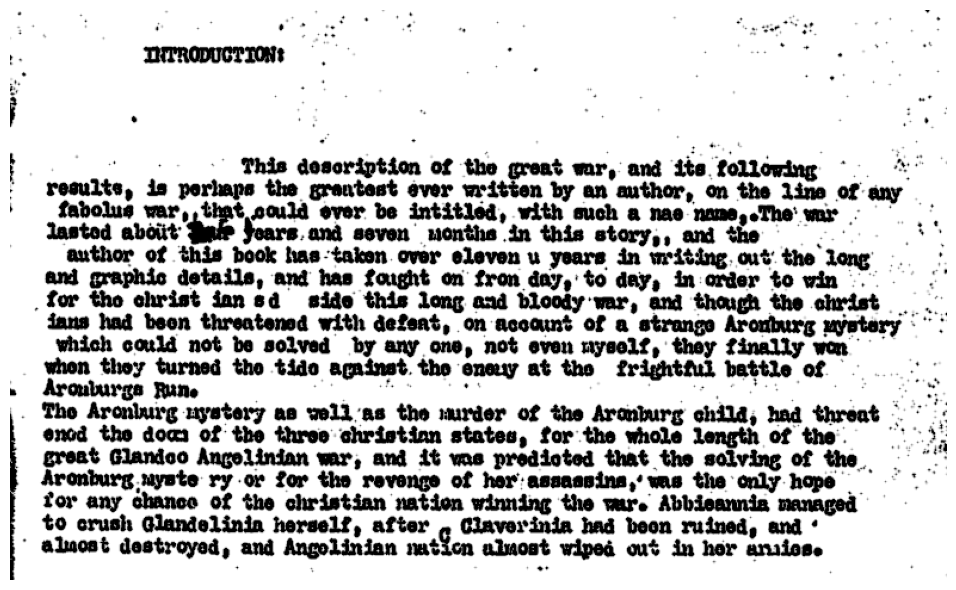

In [ ]:
processed_image = morphology.erosion(text_img, s_elem1)
processed_image = np.clip(((1-text_img)*1.5 + (1-processed_image)*0.5),
               0,1)
processed_image = 1-processed_image

plt.figure(figsize = (10,6))
plt.imshow(processed_image, cmap = "gray")
plt.axis(False)
plt.tight_layout()
plt.show()

2. If you can see background of text image is having some noise. To make our background clear you need to remove noises as much as possible.

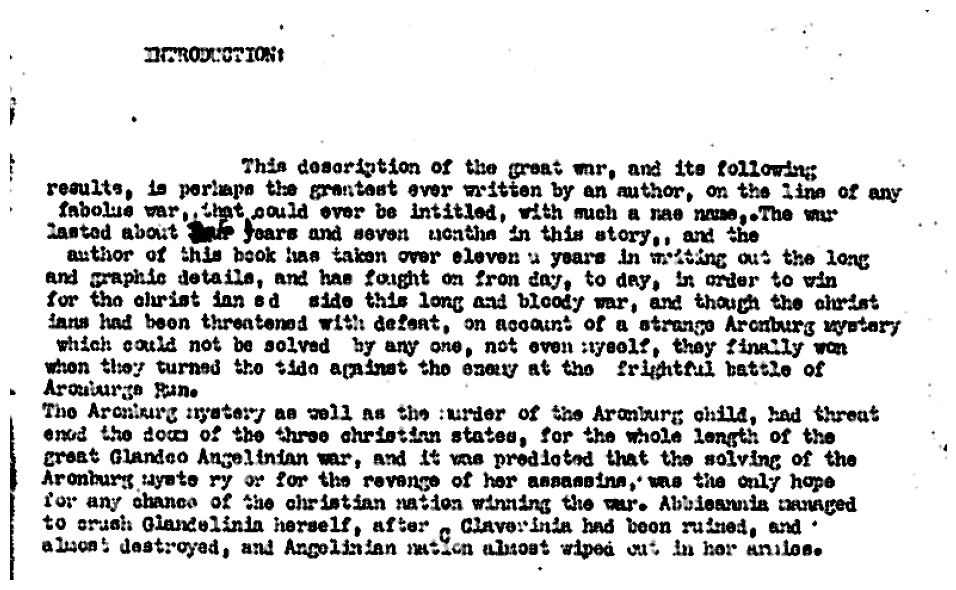

In [ ]:
processed_image = morphology.closing(text_img, s_elem1)
processed_image = np.clip((1-processed_image)*3,
               0,1)
processed_image = 1-processed_image

plt.figure(figsize = (10,6))
plt.imshow(processed_image, cmap = "gray")
plt.axis(False)
plt.tight_layout()
plt.show()

# Section 4

Binary image processing (Measurement)


> Data that you'll use in this section is "Mitosis cells" and implement to solve each prblem to get result with scikit-image libraries.


1.   Please show this following details of


*   Show area of objects.
*   Create bounding box cover each objects.
*   Show centroid of each objects.
*   Show eccentricity of each objects.
*   Show solidity of each objects.





Downloading...
From: https://drive.google.com/uc?id=1_mCcNuUPuSPUew0T-EmoTZBRNcOJ0jDM
To: /content/mitosis_mod.tif
100% 5.16k/5.16k [00:00<00:00, 12.7MB/s]


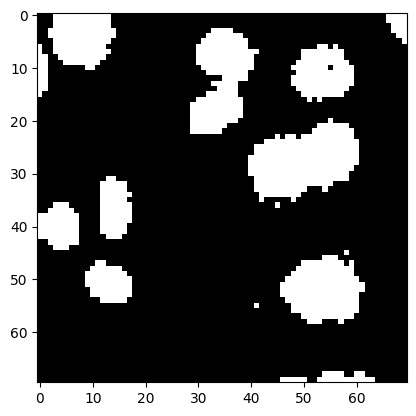

In [ ]:
#import data
!gdown 1_mCcNuUPuSPUew0T-EmoTZBRNcOJ0jDM

image_path = '/content/mitosis_mod.tif'
image_cells = io.imread(image_path, as_gray=True)
image_cells_binary = image_cells > 65
plt.imshow(image_cells_binary, cmap = "gray")

In [ ]:
# Answer your code here
from skimage.measure import label, regionprops, centroid

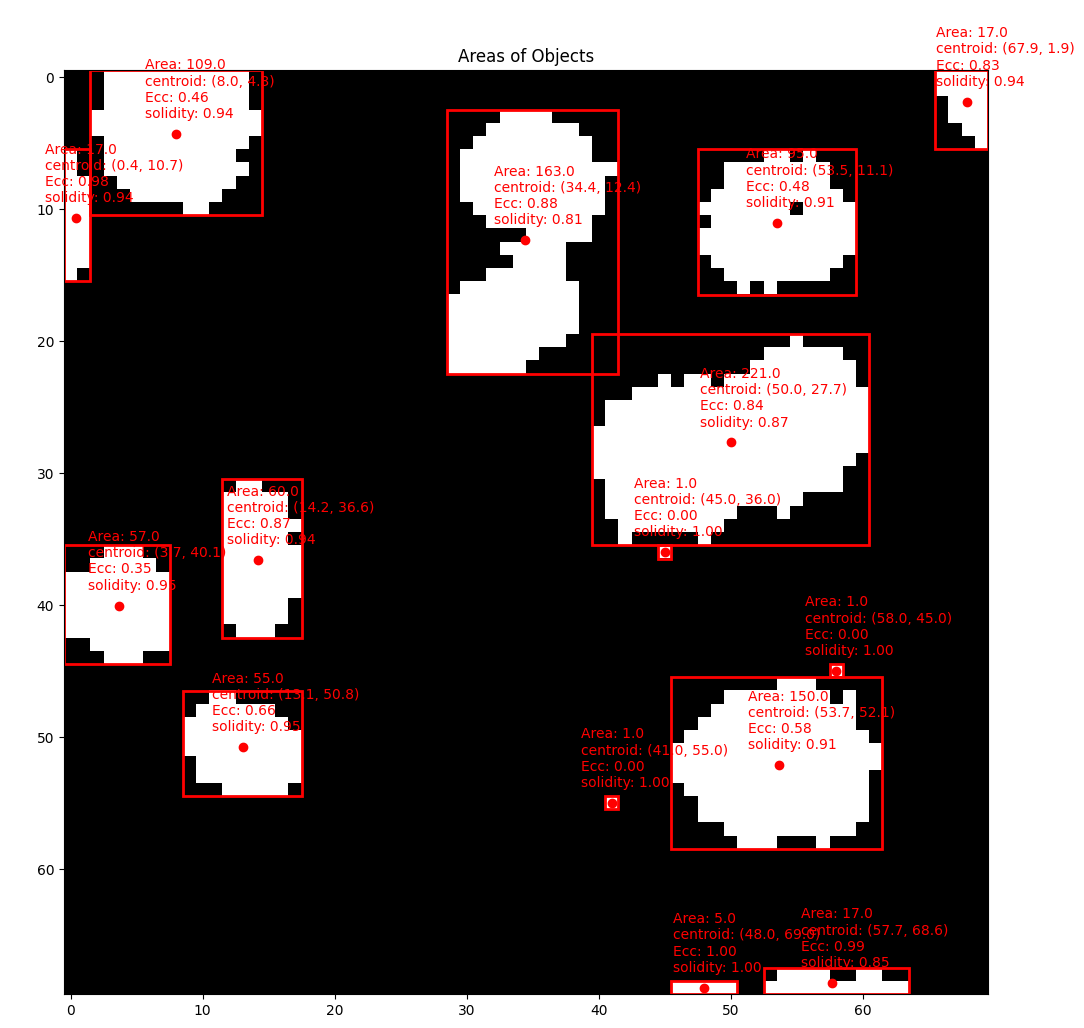

In [ ]:
labeled_image = label(image_cells_binary, connectivity=2)
regions = regionprops(labeled_image)

fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(image_cells_binary, cmap='gray', interpolation='none')
ax.set_title('Areas of Objects')

for region in regions:
    area = region.area
    min_row, min_col, max_row, max_col = region.bbox
    centroid_y, centroid_x = region.centroid
    eccentricity = region.eccentricity
    solidity = region.solidity
    rect = plt.Rectangle(
        (min_col-0.5, min_row-0.5),
        max_col - min_col,
        max_row - min_row,
        edgecolor='red',
        facecolor='none',
        linewidth=2
    )
    ax.add_patch(rect)

    ax.plot(centroid_x, centroid_y, 'ro')



    phrase =\
        f"""
        Area: {area}
        centroid: ({centroid_x:.1f}, {centroid_y:.1f})
        Ecc: {eccentricity:.2f}
        solidity: {solidity:.2f}
        """
    ax.text(centroid_x-5, centroid_y, phrase,
            color='red', fontsize=10)
